In [1]:
import numpy as np
import tensorflow.keras
from tensorflow import keras
import torch
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Conv2D, MaxPooling2D,ReLU
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model #save and load models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
import IPython.display as ipd
from kymatio import Scattering1D
import hitdifferentparts
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pescador
import random
import os
import librosa
import pickle
import matplotlib.pyplot as plt
import math

In [22]:
output_dir = "/home/hh2263/wave2shape/sbatch/07_train10trials/output/10trials_3/"

In [23]:
os.listdir(output_dir)

['tests6',
 'tests1',
 'tests5',
 'tests8',
 'tests2',
 'tests10',
 'tests7',
 'tests3',
 'tests9',
 'tests4']

In [24]:
trial=1
pickle_name = "_".join(
                ["scattering",
                "J-" + str(6).zfill(2), "Q-" + str(1).zfill(2), "order" + str(1)]
            )
save_log = os.path.join(output_dir,"tests"+str(trial)+"/"+pickle_name+"_score.pkl")
print(save_log)
#pkl_test = open(save_log,'rb')

/home/hh2263/wave2shape/sbatch/07_train10trials/output/10trials_3/tests1/scattering_J-06_Q-01_order1_score.pkl


In [25]:
pkl_test = open(save_log,'rb')
val_loss,train_loss,test_loss = pickle.load(pkl_test)
 

In [26]:
#pkl_dir = '/scratch/hh2263/drum_data/han2020fa_sc-pkl/'
record = []
J=[6,8,10,12,14]
trials = [1,2,3,4,5,6,7,8,9,10]
Q=1
order = [1,2]
order1=[]
order2=[]
j1=[]
j2=[]
for trial in trials:
    for j in J:
        for o in order:
            pickle_name = "_".join(
                ["scattering",
                "J-" + str(j).zfill(2), "Q-" + str(Q).zfill(2), "order" + str(o)]
            )
            save_log = os.path.join(output_dir,"tests"+str(trial)+"/"+pickle_name+"_score.pkl")
            #print(save_log)
            pkl_test = open(save_log,'rb')
            val_loss,train_loss,test_loss = pickle.load(pkl_test)
            if o==1:
                order1.append(val_loss)
                j1.append(j)
            else:
                order2.append(val_loss)
                j2.append(j)


In [27]:
order1 = np.array(order1).reshape((10,5))
order2 = np.array(order2).reshape((10,5))

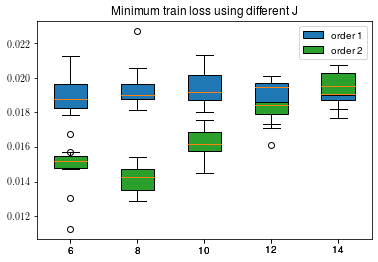

In [28]:
labels = ['6','8','10','12','14']
bp0 = plt.boxplot(order1, labels=labels, patch_artist=True)
bp1 = plt.boxplot(order2, labels=labels, patch_artist=True)

for box in bp0['boxes']:
    # change outline color
    #box.set(color='black', linewidth=2)
    # change fill color
    box.set(facecolor = 'C0' )
    # change hatch
    #box.set(hatch = '/')

for box in bp1['boxes']:
    #box.set(color='black', linewidth=2)
    box.set(facecolor = 'C2' )
plt.title('Minimum train loss using different J')

plt.legend([bp0["boxes"][0], bp1["boxes"][0]], ['order 1', 'order 2'], loc='upper right')

In [29]:
order2

array([[0.01673429, 0.01382887, 0.01591962, 0.0161166 , 0.02042308],
       [0.01502333, 0.01304736, 0.01614123, 0.01840568, 0.0190222 ],
       [0.01470979, 0.01291078, 0.01450792, 0.01862694, 0.01912274],
       [0.01128218, 0.01540167, 0.01730584, 0.01933422, 0.02021025],
       [0.01540026, 0.01441853, 0.01630181, 0.01850362, 0.01907865],
       [0.01529871, 0.0134472 , 0.01506565, 0.01815028, 0.01868698],
       [0.01302831, 0.01407394, 0.01705497, 0.01862409, 0.01989469],
       [0.01550474, 0.01483217, 0.01623058, 0.01734065, 0.02034185],
       [0.01569713, 0.01446672, 0.01757788, 0.01960308, 0.01768541],
       [0.01509282, 0.01489838, 0.0157532 , 0.01785393, 0.02073365]])

In [30]:
from matplotlib import rc
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)



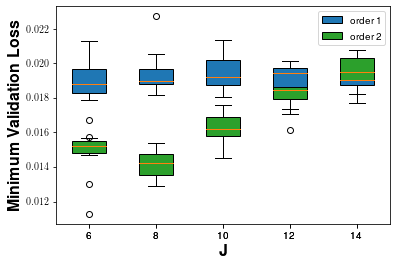

In [31]:
matplotlib.rcParams['text.usetex'] = True
#labels = ['$\displaystyle\omega$','$\displaystyle\\tau$','$\displaystyle p$','$\displaystyle D$','$\displaystyle\\alpha$']
labels = ['6','8','10','12','14']
bp0 = plt.boxplot(order1, labels=labels, patch_artist=True)
bp1 = plt.boxplot(order2, labels=labels, patch_artist=True)

for box in bp0['boxes']:
    # change outline color
    #box.set(color='black', linewidth=2)
    # change fill color
    box.set(facecolor = 'C0' )
    # change hatch
    #box.set(hatch = '/')

for box in bp1['boxes']:
    #box.set(color='black', linewidth=2)
    box.set(facecolor = 'C2' )
#plt.title('Minimum validation loss using different J')
plt.xlabel(r'\textbf{J}',fontsize=16)
plt.ylabel(r'\textbf{Minimum Validation Loss}',fontsize=16)
plt.legend([bp0["boxes"][0], bp1["boxes"][0]], ['order 1', 'order 2'], loc='upper right')

In [43]:
plt.savefig('./min_val_loss_J.pdf', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Minimum test loss using different J')

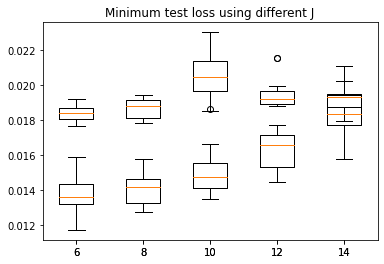

In [8]:
labels = ['6','8','10','12','14']
plt.boxplot(order1,labels = labels)
plt.boxplot(order2,labels = labels)
plt.title('Minimum test loss using different J')

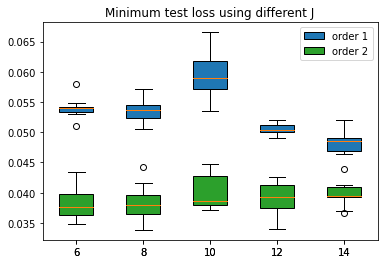

In [31]:
bp0 = plt.boxplot(order1, labels=labels, patch_artist=True)
bp1 = plt.boxplot(order2, labels=labels, patch_artist=True)

for box in bp0['boxes']:
    # change outline color
    #box.set(color='black', linewidth=2)
    # change fill color
    box.set(facecolor = 'C0' )
    # change hatch
    #box.set(hatch = '/')

for box in bp1['boxes']:
    #box.set(color='black', linewidth=2)
    box.set(facecolor = 'C2' )
plt.title('Minimum test loss using different J')

plt.legend([bp0["boxes"][0], bp1["boxes"][0]], ['order 1', 'order 2'], loc='upper right')

In [36]:
order2

array([[0.01673429, 0.01382887, 0.01591962, 0.0161166 , 0.02042308],
       [0.01502333, 0.01304736, 0.01614123, 0.01840568, 0.0190222 ],
       [0.01470979, 0.01291078, 0.01450792, 0.01862694, 0.01912274],
       [0.01128218, 0.01540167, 0.01730584, 0.01933422, 0.02021025],
       [0.01540026, 0.01441853, 0.01630181, 0.01850362, 0.01907865],
       [0.01529871, 0.0134472 , 0.01506565, 0.01815028, 0.01868698],
       [0.01302831, 0.01407394, 0.01705497, 0.01862409, 0.01989469],
       [0.01550474, 0.01483217, 0.01623058, 0.01734065, 0.02034185],
       [0.01569713, 0.01446672, 0.01757788, 0.01960308, 0.01768541],
       [0.01509282, 0.01489838, 0.0157532 , 0.01785393, 0.02073365]])

In [32]:
j_best = 8
trial_best = 3
Q=1
o=2
pickle_name = "_".join(
                ["J-" + str(j_best).zfill(2), "Q-" + str(1).zfill(2), "order" + str(2)]
            )
best_model_path = os.path.join(output_dir,"tests"+str(trial_best)+"/"+pickle_name+".h5")
print(best_model_path)


/home/hh2263/wave2shape/sbatch/07_train10trials/output/10trials_3/tests3/J-08_Q-01_order2.h5


In [35]:
pkl_dir = '/scratch/hh2263/drum_data/han2020fa_sc-pkl/'
model_best = create_model_adjustable(j_best,1,2,k_size=8,nchan_out=16,activation='linear')
model_best.load_weights(best_model_path)
#load test and train files
pickle_name = "_".join(
    ["scattering",
    "J-" + str(j_best).zfill(2), "Q-" + str(Q).zfill(2), "order" + str(o)]
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: all CUDA-capable devices are busy or unavailable

In [8]:
pkl_dir = '/scratch/hh2263/drum_data/han2020fa_sc-pkl/'
pickle_name = "_".join(
    ["scattering",
    "J-" + str(j_best).zfill(2), "Q-" + str(Q).zfill(2), "order" + str(o)]
)
pkl_path_test = os.path.join(pkl_dir,pickle_name+"_fold-test.pkl")
pkl_test = open(pkl_path_test,'rb')
Sy_test,y_test = pickle.load(pkl_test)
pkl_path_train = os.path.join(pkl_dir,pickle_name+"_fold-train.pkl")
pkl_train = open(pkl_path_train, 'rb')
Sy_train,y_train = pickle.load(pkl_train)

In [9]:
for idx in range(2,4):
    y_train[:,idx] = [math.log10(i) for i in y_train[:,idx]]
    y_test[:,idx] = [math.log10(i) for i in y_test[:,idx]]

scaler = MinMaxScaler()
scaler.fit(y_train)
y_test_normalized = scaler.transform(y_test)
#log scale the input
eps = 1e-1 #11
Sy_test_log2 = np.log1p((Sy_test>0)*Sy_test/eps)



In [10]:
Sy_test_log2.shape

(10000, 512, 26)

In [15]:
model_best.evaluate(Sy_test_log2,y_test_normalized)

10000/10000 [==============================] - 4s 394us/sample - loss: 0.0386 - mean_squared_error: 0.0386


[0.038570300471782684, 0.038570292]

In [16]:
diff = []
for i in range(10000):
    original = y_test_normalized[i,:]
    Sx = Sy_test_log2[i,:,:]
    recovered = model_best.predict(Sx.reshape((1,512,26)))
    diff.append(recovered-original)
diff_stacked = np.stack(np.abs(diff))
diff_stacked = diff_stacked.reshape((10000,5))

Text(0.5, 1.0, 'Absolute Error between reconstructed and original physical parameters')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


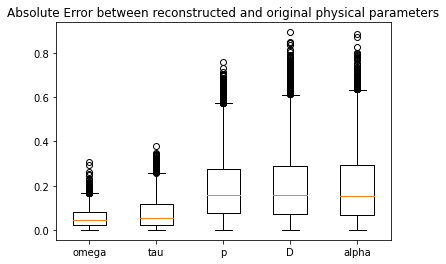

In [21]:
matplotlib.rcParams['text.usetex'] = False
labels = ['omega','tau','p','D','alpha']
plt.boxplot(diff_stacked,labels = labels)
plt.title('Absolute Error between reconstructed and original physical parameters')

In [18]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


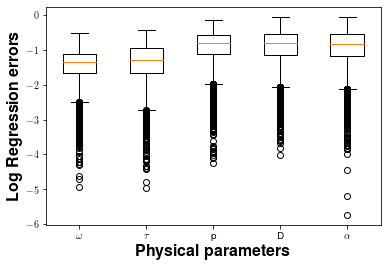

In [20]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
#labels = [r'\textbf{\omega}',r'\textbf{\tau}',r'\textbf{p}',r'\textbf{D}',r'\textbf{\alpha}']
labels = ['$\displaystyle\omega$','$\displaystyle\\tau$','p','D','$\displaystyle\\alpha$']
plt.boxplot(np.log10(diff_stacked),labels = labels)
plt.xlabel(r'\textbf{Physical parameters}',fontsize=16)
plt.ylabel(r'\textbf{Log Regression errors}',fontsize=16)
#plt.title('Log Absolute Error between reconstructed and original physical parameters')
plt.savefig("./physicalparam_boxplot_log.pdf",bbox_inches="tight")

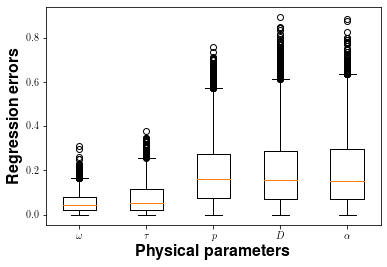

In [22]:
matplotlib.rcParams['text.usetex'] = True
#labels = [r'\textbf{\omega}',r'\textbf{\tau}',r'\textbf{p}',r'\textbf{D}',r'\textbf{\alpha}']
labels = ['$\displaystyle\omega$','$\displaystyle\\tau$','$\displaystyle p$','$\displaystyle D$','$\displaystyle\\alpha$']
plt.boxplot(diff_stacked,labels = labels)
plt.xlabel(r'\textbf{Physical parameters}',fontsize=16)
plt.ylabel(r'\textbf{Regression errors}',fontsize=16)
#plt.title('Log Absolute Error between reconstructed and original physical parameters')
plt.savefig("./physicalparam_boxplot.pdf",bbox_inches="tight")

Text(0, 0.5, '\\textbf{Regression errors ($\\displaystyle \\%$)}')

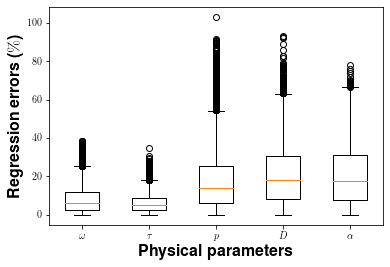

In [40]:
matplotlib.rcParams['text.usetex'] = True
#labels = [r'\textbf{\omega}',r'\textbf{\tau}',r'\textbf{p}',r'\textbf{D}',r'\textbf{\alpha}']
labels = ['$\displaystyle\omega$','$\displaystyle\\tau$','$\displaystyle p$','$\displaystyle D$','$\displaystyle\\alpha$']
plt.boxplot(diff_stacked*100,labels = labels)
plt.xlabel(r'\textbf{Physical parameters}',fontsize=16)
plt.ylabel(r'\textbf{Regression errors ($\displaystyle \%$)}',fontsize=16)
#plt.title('Log Absolute Error between reconstructed and original physical parameters')
#plt.savefig("./physicalparam_boxplot.pdf",bbox_inches="tight")

In [34]:
def create_model_adjustable(J,Q,order,k_size,nchan_out,activation):
	N = 2**15
	y = np.random.rand(N)
	scattering = Scattering1D(J = J,shape=(N,), Q = Q, max_order=order)
	Sy = np.array(scattering(torch.Tensor(y))).T
	input_x,input_y = Sy.shape
	nchan_in = 1       # number of input channels.  1 since it is BW

	input_shape = (input_x,input_y)#Sy.shape
	kernel_size = (k_size,)
	K.clear_session()
	model=Sequential()
	#1 conv layer +  1 batch normalization + nonlinear activation + pooling
	model.add(BatchNormalization(input_shape=input_shape))
	model.add(Conv1D(filters=nchan_out,
		kernel_size=kernel_size, padding="same",name='conv1'))
	#model.add(BatchNormalization())
	model.add(Activation("relu"))

	if model.layers[-1].output_shape[1]>=4:
		pool = 4
	elif model.layers[-1].output_shape[1]==2:
		pool = 2
	    
	model.add(AveragePooling1D(pool_size=(pool,)))


	for i in range(3):
		model.add(Conv1D(filters=nchan_out,
		             kernel_size=kernel_size, padding="same" ))
		model.add(BatchNormalization())
		model.add(Activation("relu"))
		#print('before pool',model.layers[-1].output_shape)
		if model.layers[-1].output_shape[1] >= 4:
			model.add(AveragePooling1D(pool_size=(4,)))
		elif model.layers[-1].output_shape[1] == 2:
			model.add(AveragePooling1D(pool_size=(2,)))
		#print(model.layers[-1].output_shape)

	model.add(BatchNormalization())
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(BatchNormalization())
	#what activation should be chosen for last layer, for regression problem? should be a linear function
	model.add(Dense(5, activation=activation)) #output layer that corresponds to the 5 physical parameters.


	# Compile the model
	model.compile(loss='mse', optimizer='adam', metrics=['mse'])




	return model

## recover shape from interpolation

In [17]:
import interpolate_shape

In [18]:
j_best = 8
trial_best = 3
pickle_name = "_".join(
                ["J-" + str(j_best).zfill(2), "Q-" + str(1).zfill(2), "order" + str(2)]
            )
best_model_path = os.path.join(output_dir,"tests"+str(trial_best)+"/"+pickle_name+".h5")
print(best_model_path)
#model_best = create_model_adjustable(j_best,1,2,k_size=8,nchan_out=16,activation='linear')
#model_best.load_weights(best_model_path)

#interpolate_shape(x,y,num,prec,J,model_path,w,tau,p,D,alpha)
hist,prediction = interpolate_shape.interpolate_shape(0.5,0.5,4,0.05,8,best_model_path,w=200*2*np.pi,tau=0.02,p=0.1,D=0.01,alpha=0.8)

/home/hh2263/wave2shape/sbatch/07_train10trials/output/10trials/tests3/J-08_Q-01_order2.h5
--- 1.4902889728546143 seconds ---
--- 1.4831650257110596 seconds ---
--- 1.4937803745269775 seconds ---
--- 1.480173110961914 seconds ---


TypeError: '>' not supported between instances of 'tuple' and 'int'

In [12]:
import hitdifferentparts
def interpolate_sounds(x_coord,y_coord,num,prec,J,w,tau,p,D,alpha):
		"""
		x_coord, y_coord is the point at which you want to interpolate the sounds
		num is number of interpolation points
		prec is distance between interpolated to interpolation points
		"""
		scs = []
		sounds = []
		if num == 2:
			inter = [(x_coord+prec,y_coord),(x_coord-prec,y_coord)]
		elif num == 4:
			inter = [(x_coord+prec,y_coord),(x_coord-prec,y_coord),(x_coord,y_coord+prec),(x_coord,y_coord-prec)]
		for (x,y) in inter:
			y = hitdifferentparts.hitdiffparts(x,y,w,tau,p,D,alpha)
			Sy = getsc(torch.Tensor(y),J)
			sounds.append(y)
			scs.append(Sy)
		return sum(scs)/float(num),sounds


def getsc(y, J):
	"""
	this function outputs scattering transform of a time-domain signal.
	"""
	N = len(y)
	scattering = Scattering1D(J = J,shape=(N,))
	Sy = scattering(y)
	return Sy

def interpolate_shape(x,y,num,prec,J,model_path,w,tau,p,D,alpha):
    #prepare scattering features 
	Sy_interpolated,sounds = interpolate_sounds(x,y,num,prec,J,w,tau,p,D,alpha)#this J should be small to recover sound	
	Sy_interpolated_log = np.log1p(((Sy_interpolated>0)*Sy_interpolated)/1e-11)
	Sy_interpolated_log = Sy_interpolated_log.T
	n,m = Sy_interpolated_log.shape

	#prepare normalized ground truth
	scaler = getscaler()
	gt_original = np.array([w,tau,p,D,alpha]).reshape((1,5))
	gt_normalized = scaler.transform(gt_original)

	#prepare model
	model_best = create_model_adjustable(J,1,2,k_size=8,nchan_out=16,activation='linear')
	model_best.load_weights(model_path)
	hist = model_best.evaluate(np.array(Sy_interpolated_log).reshape(1,n,m),gt_normalized)
	model_predict = model_best.predict(Sy_interpolated_log.reshape(1,n,m))
	return hist,model_predict

def getscaler():
	df_train = pd.read_csv("../notebooks/train_param.csv")
	params = df_train.values[:,1:-1]
	for idx in range(2,4):
		params[:,idx] = [math.log10(i) for i in params[:,idx]]

	scaler = MinMaxScaler()
	scaler.fit(params)

	return scaler




In [57]:
omega = list(np.linspace(200*np.pi,4000*np.pi,20))
tau = list(np.linspace(0.01,0.3,20))
p = list(np.logspace(np.log10(0.0001),np.log10(2),20))
D = list(np.logspace(np.log10(0.0001),np.log10(10),20))
alpha = list(np.linspace(0.001,1,20))

In [ ]:
Sy_interpolated,sounds = interpolate_sounds(x,y,num,prec,J,w,tau,p,D,alpha)#this J should be small to recover sound	
Sy_interpolated_log = np.log1p(((Sy_interpolated>0)*Sy_interpolated)/1e-11)
Sy_interpolated_log = Sy_interpolated_log.T
n,m = Sy_interpolated_log.shape

#prepare normalized ground truth
scaler = getscaler()
gt_original = np.array([w,tau,p,D,alpha]).reshape((1,5))
gt_normalized = scaler.transform(gt_original)

#prepare model
model_best = create_model_adjustable(J,1,2,k_size=8,nchan_out=16,activation='linear')
model_best.load_weights(model_path)
hist = model_best.evaluate(np.array(Sy_interpolated_log).reshape(1,n,m),gt_normalized)
model_predict = model_best.predict(Sy_interpolated_log.reshape(1,n,m))


In [40]:
records = []
for o in omega:
    hist,shape = interpolate_shape(0.5,0.5,4,0.05,8,best_model_path,o,tau[0],p[0],D[0],alpha[0])
    records.append(hist[0])
                    

--- 1.5205738544464111 seconds ---
--- 1.5094895362854004 seconds ---
--- 1.5132930278778076 seconds ---
--- 1.5123417377471924 seconds ---
1/1 [==============================] - 0s 140ms/sample - loss: 0.0452 - mean_squared_error: 0.0452
--- 1.5095105171203613 seconds ---
--- 1.504124641418457 seconds ---
--- 1.5040981769561768 seconds ---
--- 1.5051872730255127 seconds ---
1/1 [==============================] - 0s 141ms/sample - loss: 0.0503 - mean_squared_error: 0.0503
--- 1.5106847286224365 seconds ---
--- 1.5193994045257568 seconds ---
--- 1.510310173034668 seconds ---
--- 1.5248305797576904 seconds ---
1/1 [==============================] - 0s 142ms/sample - loss: 0.0617 - mean_squared_error: 0.0617
--- 1.5182464122772217 seconds ---
--- 1.5273258686065674 seconds ---
--- 1.5240614414215088 seconds ---
--- 1.515343189239502 seconds ---
1/1 [==============================] - 0s 141ms/sample - loss: 0.0891 - mean_squared_error: 0.0891
--- 1.517139196395874 seconds ---
--- 1.5035257

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'omega')

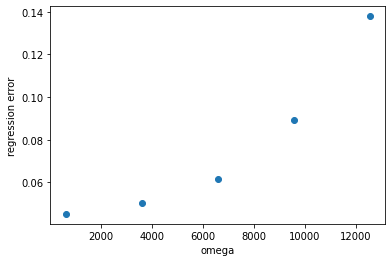

In [44]:
plt.scatter(omega,records)
plt.ylabel('regression error')
plt.xlabel('omega')

In [45]:
records2 = []
for t in tau:
    hist,shape = interpolate_shape(0.5,0.5,4,0.05,8,best_model_path,omega[0],t,p[0],D[0],alpha[0])
    records2.append(hist[0])

--- 1.502150058746338 seconds ---
--- 1.5084543228149414 seconds ---
--- 1.512162208557129 seconds ---
--- 1.5108673572540283 seconds ---
1/1 [==============================] - 0s 142ms/sample - loss: 0.0452 - mean_squared_error: 0.0452
--- 1.4893858432769775 seconds ---
--- 1.4867570400238037 seconds ---
--- 1.5717978477478027 seconds ---
--- 1.4849941730499268 seconds ---
1/1 [==============================] - 0s 140ms/sample - loss: 0.0677 - mean_squared_error: 0.0677
--- 1.4957458972930908 seconds ---
--- 1.490832805633545 seconds ---
--- 1.4940354824066162 seconds ---
--- 1.4991118907928467 seconds ---
1/1 [==============================] - 0s 141ms/sample - loss: 0.0881 - mean_squared_error: 0.0881
--- 1.4941418170928955 seconds ---
--- 1.4943714141845703 seconds ---
--- 1.5052483081817627 seconds ---
--- 1.4908921718597412 seconds ---
1/1 [==============================] - 0s 138ms/sample - loss: 0.0796 - mean_squared_error: 0.0796
--- 1.4964308738708496 seconds ---
--- 1.478619

Text(0.5, 0, 'tau')

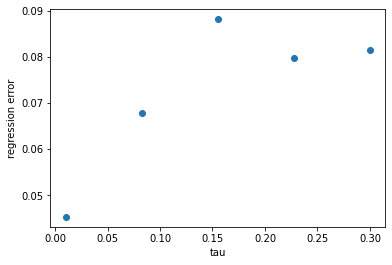

In [46]:
plt.scatter(tau,records2)
plt.ylabel('regression error')
plt.xlabel('tau')

In [52]:
tau

[0.01, 0.08249999999999999, 0.155, 0.22749999999999998, 0.3]

In [56]:
t = np.random.choice(tau)
print(t)

0.155


In [61]:
re2 = []
for i in range(50):
    o = np.random.choice(omega)
    t = np.random.choice(tau)
    pp = np.random.choice(p)
    d = np.random.choice(D)
    a = np.random.choice(alpha)
    hist,shape = interpolate_shape(0.5,0.5,4,0.05,8,best_model_path,o,t,pp,d,a)
    re.append(hist[0])
    

--- 1.4898793697357178 seconds ---
--- 1.4843013286590576 seconds ---
--- 1.478513479232788 seconds ---
--- 1.4944274425506592 seconds ---
1/1 [==============================] - 0s 140ms/sample - loss: 0.4227 - mean_squared_error: 0.4227
--- 1.4781584739685059 seconds ---
--- 1.4903299808502197 seconds ---
--- 1.4881541728973389 seconds ---
--- 1.487833023071289 seconds ---
1/1 [==============================] - 0s 139ms/sample - loss: 0.2026 - mean_squared_error: 0.2026
--- 1.5004911422729492 seconds ---
--- 1.498441457748413 seconds ---
--- 1.4991469383239746 seconds ---
--- 1.4935903549194336 seconds ---
1/1 [==============================] - 0s 140ms/sample - loss: 1.2065 - mean_squared_error: 1.2065
--- 1.491056203842163 seconds ---
--- 1.4947524070739746 seconds ---
--- 1.4987304210662842 seconds ---
--- 1.4959862232208252 seconds ---
1/1 [==============================] - 0s 149ms/sample - loss: 0.0780 - mean_squared_error: 0.0780
--- 1.5145599842071533 seconds ---
--- 1.5062177

--- 1.4931201934814453 seconds ---
1/1 [==============================] - 0s 131ms/sample - loss: 0.2722 - mean_squared_error: 0.2722
--- 1.4941127300262451 seconds ---
--- 1.4884259700775146 seconds ---
--- 1.4833126068115234 seconds ---
--- 1.4869425296783447 seconds ---
1/1 [==============================] - 0s 144ms/sample - loss: 0.1511 - mean_squared_error: 0.1511
--- 1.4936187267303467 seconds ---
--- 1.4903168678283691 seconds ---
--- 1.4960887432098389 seconds ---
--- 1.486710786819458 seconds ---
1/1 [==============================] - 0s 151ms/sample - loss: 0.1443 - mean_squared_error: 0.1443
--- 1.496330976486206 seconds ---
--- 1.5074145793914795 seconds ---
--- 1.502669334411621 seconds ---
--- 1.494281530380249 seconds ---
1/1 [==============================] - 0s 144ms/sample - loss: 0.1516 - mean_squared_error: 0.1516
--- 1.5007340908050537 seconds ---
--- 1.4920711517333984 seconds ---
--- 1.4976532459259033 seconds ---
--- 1.5017235279083252 seconds ---
1/1 [========

the test loss of this best model is 0.041600674617290494

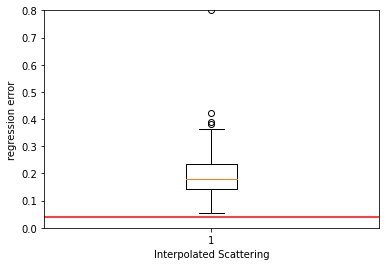

In [84]:
plt.boxplot(re)
plt.ylabel('regression error')
plt.xlabel('Interpolated Scattering')
plt.ylim([0,0.8])
plt.axhline(y=0.04,color = 'r')


In [64]:
sum(np.array(re)<0.8)

64

In [65]:
len(re)

70